In [159]:
#import the following libraries
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, metrics, model_selection, svm
import seaborn as sns
from IPython.display import display_html
import ipywidgets as widgets

# Data Set Information and Visualizations

The data set utilized in this project includes various health information, along with a binary variable to determine whether there was an incident of stoke amoungst the participants.

In [160]:
data = pd.read_csv("stroke_data_clean.csv") # read CSV
data #display the DataFrame

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,38,1,0,56.90,92.0,0
1,23,1,0,70.03,78.0,0
2,42,0,0,210.48,71.9,0
3,52,0,0,78.40,64.8,0
4,27,0,0,57.96,64.4,0
...,...,...,...,...,...,...
3421,10,0,0,57.28,15.4,0
3422,13,0,0,122.31,15.3,0
3423,70,1,0,214.77,15.0,0
3424,67,0,0,82.09,14.1,0


### The following bar plots demonstrate the distribution of the ages of the study participants and the incident of stroke

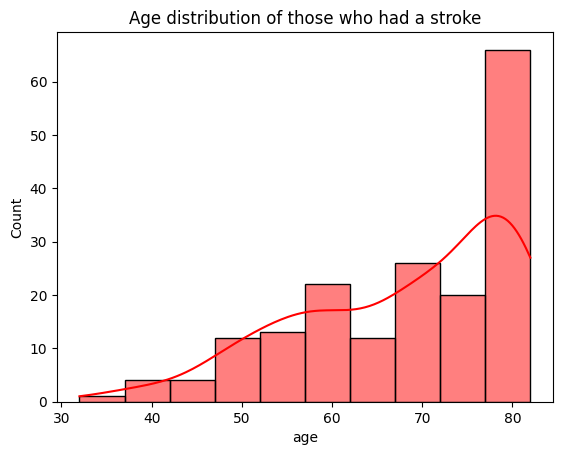

In [161]:
plt.title('Age distribution of those who had a stroke') # Set the title for the plot
# Select the age column for individuals who had a stroke
B = data[data['stroke'] == 1]['age'] 
# Create a histogram of the age values with a red color and 10 bins
sns.histplot(B, color ='red', kde=True, bins = 10)
# Show the plot
plt.show()

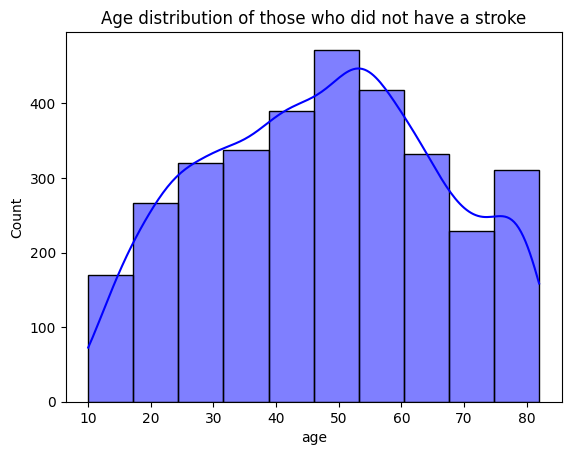

In [162]:
plt.title('Age distribution of those who did not have a stroke')
# Select the age column for individuals who did not have a stroke
A = data[data['stroke'] == 0]['age']
sns.histplot(A, color ='blue', kde=True, bins = 10)
plt.show()

As observed from the above data, the number of participants who did not experience a stroke significantly exceeded the number of those who did. 

Additionally, the data suggests that the likelihood of stroke significantly increases in participants as they reach their 70s and 80s.

### Below is a hexagonal binning plot to vizualize the distribution of Age and Average Glucose Level with Stroke Incidence count

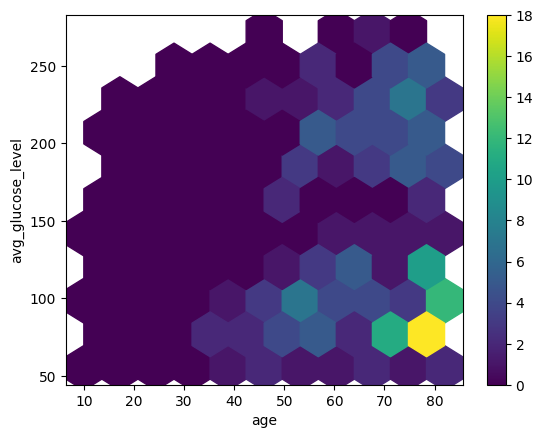

In [163]:
ax = data.plot.hexbin(x='age',
                    y='avg_glucose_level',
                    C='stroke',
                    reduce_C_function=np.sum,
                    gridsize=10,
                    cmap="viridis")

Again, as we can see age seems to be a larger indicator of risk of stroke rather than glucose level. 

It may seem like the lower half of the average glucose measurements seem to have higher incident of stroke. However, the CDC deems any glucose reading under 100 as considered "normal" so it is possible that the higher incidence of stroke could potentially be attributed to the larger sample size of participants in a normal glucose range.

### This scatterplot demonstrates the correlation of BMI and Average Glucose level to the incident of stroke.

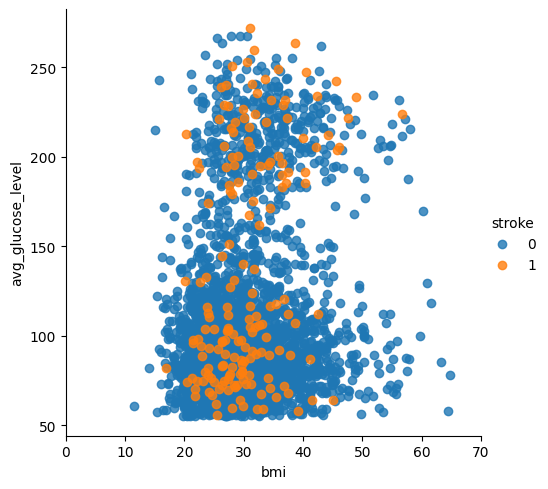

In [164]:
# Create a scatter plot of BMI and average glucose level, with points colored by stroke status
sns.lmplot(x='bmi', y='avg_glucose_level', data=data, fit_reg=False, hue='stroke')
# Set the x-axis limit to be between 0 and 70
plt.xlim(0, 70)
plt.show()

In the above data visualization, the orange icons represent participants who experienced a stroke, while the blue icons indicate those who did not. 

As hypothesized, the density of participants within the <150 range is fairly high among both the stroke and non-stroke groups.

However, when examining the relationship between BMI and glucose levels and its relevance to stroke incidence, a clear visual correlation is not evident.

### Below is standard information on all the categories

In [165]:
data.describe(include='all')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000
mean,48.645943,0.119089,0.060128,108.321891,30.290047,0.052539
std,18.851239,0.323941,0.237759,47.703541,7.295958,0.223145
min,10.000000,0.000000,0.000000,55.120000,11.500000,0.000000
25%,34.000000,0.000000,0.000000,77.237500,25.300000,0.000000
50%,50.000000,0.000000,0.000000,92.360000,29.100000,0.000000
75%,63.000000,0.000000,0.000000,116.207500,34.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,92.000000,1.000000


# Model creation and Accuracy Analysis

In [166]:
regression = LogisticRegression() # Create a logistic regression model
# Create a DataFrame containing independent variables
X = DataFrame(data, columns=['age','hypertension','heart_disease','avg_glucose_level','bmi'])
y = data['stroke'].ravel() # Create an array containing dependent variable 'stroke
regression.fit(X, y) # Fit the logistic regression model

LogisticRegression()

In [167]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.3,random_state=30)

In [168]:
# Create a styler object for the X_train DataFrame with 10 rows
X_train_styler = X_train.head(10).reset_index(drop=True).style.set_table_attributes("style='display:inline'").set_caption('Risk Factors')
# Convert the y_train series object to a DataFrame object and create a styler object
y_train_df = pd.DataFrame(y_train).head(10).reset_index(drop=True)  # Convert Series to DataFrame and reset index
y_train_styler = y_train_df.style.set_table_attributes("style='display:inline'").set_caption('Stroke prediction')
# Display the X_train and y_train styler objects side by side
space = "\xa0" * 10
display_html(X_train_styler._repr_html_()+ space  + y_train_styler._repr_html_(), raw=True)

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,79,0,0,105.930000,25.200000
1,57,0,0,90.400000,26.500000
2,78,0,0,93.850000,22.700000
3,27,0,0,149.950000,25.900000
4,59,1,0,182.900000,34.400000
5,12,0,0,82.390000,17.100000
6,80,1,0,74.900000,22.200000
7,54,0,0,111.370000,29.100000
8,15,0,0,190.130000,20.700000
9,43,0,0,87.820000,38.800000


In [169]:
svm_model = svm.SVC(gamma='scale', C=1) # Create a support vector machine model
svm_model.fit(X_train,y_train) # Fit the SVM model using the training data

X_train_array, X_test_array = X_train.values, X_test.values # Convert to arrays
svm_model.fit(X_train_array,y_train) # Fit the model using the arrays

SVC(C=1)

### Accuracy Analysis

In [170]:
predictions = svm_model.predict(X_train_array) # Use the SVM model to predict the dependent variable for the training data
score = metrics.accuracy_score(y_train, predictions) # Calculate the accuracy score of the predictions for the training data
score

0.9445371142618849

In [171]:
predictions_test = svm_model.predict(X_test_array)
score2 = metrics.accuracy_score(y_test,predictions_test)
score2

0.9542801556420234

Utilizing the test data ~95% of the predictions are correct. 

# User Interface

In [172]:
#The text boxes where the user can input values.
age_widget = widgets.FloatText(description='Age: ', value='0')
htn_widget = widgets.Checkbox(value=False,description='Hypertension',disabled=False,indent=True)
heart_disease_widget = widgets.Checkbox(value=False,description='Heart Disease',disabled=False,indent=True)
glucose_widget = widgets.FloatText(description='Glucose: ', value='0')
bmi_widget = widgets.FloatText(description='BMI: ', value='0')

def widget_value (widget):
    if widget.value == True:
        return 1
    else:
        return 0

#A button for the user to get predictions using input valus. 
button_predict = widgets.Button( description='Predict' )
button_ouput = widgets.Label(value='Enter values and press the \"Predict\" button.' )

#Defines what happens when you click the button 
def on_click_predict(b):
    prediction = svm_model.predict([[
        age_widget.value, widget_value(htn_widget), widget_value(heart_disease_widget), glucose_widget.value, bmi_widget.value]])
    if prediction == 1:
        output = "Stroke"
    else:
        output = "No Stroke"
    button_ouput.value='Prediction = '+ output
button_predict.on_click(on_click_predict)

#Displays the text boxes and buttons inside a VBox 
vb=widgets.VBox([age_widget, htn_widget, heart_disease_widget, glucose_widget, bmi_widget, button_predict,button_ouput])
print('\033[1m' + 'Enter appropriate values and make a prediction' + '\033[0m')
display(vb)

Enter appropriate values and make a prediction
